<h1 style="color:#F97316;"><b>Exploratory Data Analysis of the Titanic Dataset</b></h1>

<h2 style="color:#F97316;"><b>Project objective</b></h2>

This notebook aims to conduct an exploratory data analysis of the Titanic dataset, seeking to understand its structure, identify relevant patterns, and prepare the data for a potential predictive modeling phase.

The analysis focuses on characterizing the available variables, assessing data quality, and exploring relationships between attributes, with particular attention to passenger survival.

<h2 style="color:#F97316;"><b>Dataset description</b></h2>

The dataset used corresponds to the public Titanic dataset provided by Kaggle (https://www.kaggle.com/competitions/titanic/data). Each row represents a passenger and includes information about demographic characteristics, travel class, and survival status.

The data is divided into two main files:

1. Training set, which includes the target variable Survived  
2. Test set, which contains the same explanatory variables but does not include the target variable  

The first column in both files corresponds to the passenger identifier and will be used as the index.

<h2 style="color:#F97316;"><b>Structure of the analysis</b></h2>

The analysis will be organized in the following steps:

1. Libraries Import
2. Data Import
3. Identification of duplicates  
4. Analysis of variable types  
5. Analysis of missing values  
6. Univariate analysis  
7. Multivariate analysis  
8. Conclusion  

<h2 style="color:#F97316;"><b>Tools used</b></h2>

To carry out this work, the following Python tools and libraries will be used:

pandas for data manipulation and transformation  
numpy for numerical operations  
matplotlib for data visualization  
scipy for additional statistical analysis  
scikit learn for exploratory techniques such as PCA  
Jupyter Notebook as the interactive development environment  


<h3 style="color:#F97316;"><b>1. Libraries Import</b></h3>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kurtosis, skew
from scipy.stats import chi2_contingency
from scipy.stats import gaussian_kde
from scipy.stats import pointbiserialr
from sklearn.decomposition import PCA

<h3 style="color:#F97316;"><b>2. Data Import </b></h3>

In [2]:
# Load datasets
train = pd.read_csv("train.csv", index_col=0)
test = pd.read_csv("test.csv", index_col=0)

In [3]:
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [4]:
test

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


In [5]:
print("Train shape:", train.shape)
print("Test shape:", test.shape)

Train shape: (891, 11)
Test shape: (418, 10)


The training and test datasets were loaded from CSV files.  
The first column was used as the index, as it corresponds to the passenger ID.

After loading the data, the following dimensions were obtained:
- Training set: 891 rows and 11 columns  
- Test set: 418 rows and 10 columns  

The difference in the number of columns is expected, as the test set does not include the target variable (`Survived`).


<h3 style="color:#F97316;"><b>3. Identification of duplicates </b></h3>

In [6]:
# Check for duplicate rows
train_duplicates = train.duplicated().sum()
print(f"Number of duplicate rows in train: {train_duplicates}")


Number of duplicate rows in train: 0


In [7]:
# Check for duplicate rows
test_duplicates = test.duplicated().sum()
print(f"Number of duplicate rows in test: {test_duplicates}")

Number of duplicate rows in test: 0


No duplicate rows were found in either the training or test dataset.  
Therefore, no records were removed at this stage.

<h3 style="color:#F97316;"><b>4. Analysis of variable types </b></h3>

In this section, the data types of all variables in the training and test datasets will be examined to ensure they are appropriate for analysis.

Variables will be classified into numerical and categorical types, identifying any inconsistencies or mismatches between their semantic meaning and their current data type.

When necessary, recommendations for data type adjustments will be made to support subsequent exploratory and modeling steps.


In [8]:
print("Train info:\n")
train.info()

Train info:

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [9]:
print("\nTest info:\n")
test.info()


Test info:

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [10]:
# Unique values - train dataset
for col in train.columns:
    print(f"{col}: {train[col].nunique()} unique values")

Survived: 2 unique values
Pclass: 3 unique values
Name: 891 unique values
Sex: 2 unique values
Age: 88 unique values
SibSp: 7 unique values
Parch: 7 unique values
Ticket: 681 unique values
Fare: 248 unique values
Cabin: 147 unique values
Embarked: 3 unique values


In [11]:
# Unique values - test dataset
for col in test.columns:
    print(f"{col}: {test[col].nunique()} unique values")

Pclass: 3 unique values
Name: 418 unique values
Sex: 2 unique values
Age: 79 unique values
SibSp: 7 unique values
Parch: 8 unique values
Ticket: 363 unique values
Fare: 169 unique values
Cabin: 76 unique values
Embarked: 3 unique values


In [12]:
# Convert categorical variables to the type category - train dataset
categorical_cols_train = ["Survived", "Pclass", "Sex", "Embarked"]

for col in categorical_cols_train:
    train[col] = train[col].astype("category")
    
# Convert categorical variables to the type category - test dataset
categorical_cols_test = ["Pclass", "Sex", "Embarked"]

for col in categorical_cols_test:
    test[col] = test[col].astype("category")

In [13]:
print("Train info:\n")
train.info()

Train info:

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    category
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    int64   
 6   Parch     891 non-null    int64   
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    category
dtypes: category(4), float64(2), int64(2), object(3)
memory usage: 59.7+ KB


In [14]:
print("\nTest info:\n")
test.info()


Test info:

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Pclass    418 non-null    category
 1   Name      418 non-null    object  
 2   Sex       418 non-null    category
 3   Age       332 non-null    float64 
 4   SibSp     418 non-null    int64   
 5   Parch     418 non-null    int64   
 6   Ticket    418 non-null    object  
 7   Fare      417 non-null    float64 
 8   Cabin     91 non-null     object  
 9   Embarked  418 non-null    category
dtypes: category(3), float64(2), int64(2), object(3)
memory usage: 27.7+ KB


After inspecting the dataset structure and the number of unique values in each column, the variables were classified according to their analytical meaning rather than their original Python data type.

#### Target variable
- **Survived**: Categorical (binary). Indicates whether the passenger survived (1) or not (0).

#### Categorical variables
The following variables were converted to the pandas `category` type, as they represent distinct groups rather than continuous quantities:

- **Pclass**: Categorical ordinal. Represents the passenger class (1st, 2nd, 3rd).
- **Sex**: Categorical nominal. Indicates the passenger’s gender.
- **Embarked**: Categorical nominal. Indicates the port of embarkation.

#### Numerical discrete variables
These variables take integer values and represent counts, so they are treated as numerical discrete variables:

- **SibSp**: Number of siblings or spouses aboard.
- **Parch**: Number of parents or children aboard.

#### Numerical continuous variables
These variables represent measurable quantities and are treated as continuous:

- **Age**: Continuous numerical variable (recorded in integer years).
- **Fare**: Continuous numerical variable.

#### Text variables
These variables were not treated as analytical features at this stage:

- **Name**: Text identifier, unique for most passengers.
- **Ticket**: Ticket number, high cardinality and not directly interpretable.
- **Cabin**: High number of missing values and high cardinality; requires further preprocessing if used later.

This classification will guide the subsequent steps of the Exploratory Data Analysis.

<h3 style="color:#F97316;"><b>5. Analysis of missing values </b></h3>

This section examines the presence and distribution of missing values across all variables in both the training and test datasets, assessing their extent, potential causes, and possible implications for the analysis.


In [15]:
# Percentage and # of missing values - train dataset
missing_table_train = (train.isna().sum().to_frame(name="Missing count"))
missing_table_train["Missing %"] = (missing_table_train["Missing count"] / len(train)) * 100
missing_table_train

,Missing count,Missing %
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,177,19.865320
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,0,0.000000
Cabin,687,77.104377


In [16]:
# Percentage and # of missing values - test dataset
missing_table_test = (test.isna().sum().to_frame(name="Missing count"))
missing_table_test["Missing %"] = (missing_table_test["Missing count"] / len(test)) * 100
missing_table_test

,Missing count,Missing %
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,86,20.574163
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,1,0.239234
Cabin,327,78.229665
Embarked,0,0.000000


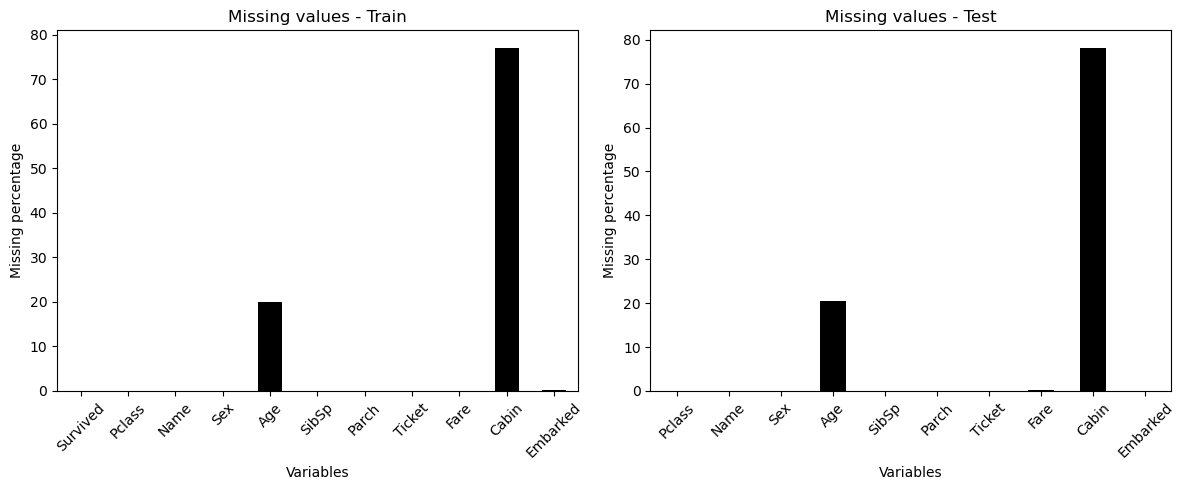

In [17]:
# Bar plot comparing the percentage of missing values in train versus test
fig, axes = plt.subplots(1, 2, figsize=(12,5))

missing_table_train["Missing %"].plot(kind="bar", ax=axes[0], color="black")
axes[0].set_title("Missing values - Train")
axes[0].set_ylabel("Missing percentage")
axes[0].set_xlabel("Variables")
axes[0].tick_params(axis="x", rotation=45)

missing_table_test["Missing %"].plot(kind="bar", ax=axes[1], color="black")
axes[1].set_title("Missing values - Test")
axes[1].set_ylabel("Missing percentage")
axes[1].set_xlabel("Variables")
axes[1].tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()

From the tables and bar plots, it is clear that the pattern of missing values is similar in both datasets. In particular:

- The variable **Cabin** has a very high proportion of missing values in both train and test (around 77 78%), indicating that it is largely incomplete and not reliable in its current form.
- The variable **Age** presents a moderate level of missing values in both datasets (around 20%), which suggests that an appropriate imputation strategy should be considered in later stages.
- The remaining variables show little or no missing data, meaning they can be used without major concerns in subsequent analyses.

These findings will guide the next steps of the EDA and the decisions regarding data preprocessing.

<h3 style="color:#F97316;"><b>6. Univariate analysis </b></h3>

In this section, the univariate analysis was structured according to the nature of the variables, separating them into three distinct groups to ensure a more appropriate and rigorous examination of their characteristics.

- **6.1 Categorical variables:** frequency distributions and mode were analyzed to understand the relative proportion of each category and to identify possible imbalances or dominant groups within the data.  
- **6.2 Discrete Numerical variables:** summary statistics and visual representations suitable for count based data were used to assess distribution and variability.  
- **6.3 Continuous Numerical variables:** descriptive statistics and distribution plots were used to evaluate central tendency, dispersion, shape, and potential outliers.  

<h4 style="color:#F97316;"><b>6.1 Categorical variables </b></h4>

In [18]:
# Create table with Mode and Number of categories for categorical variables (train)
mode_table_train = (train[categorical_cols_train].mode().iloc[0].to_frame(name="Mode"))
mode_table_train["Number of categories"] = train[categorical_cols_train].nunique()
mode_table_train

,Mode,Number of categories
Survived,0,2
Pclass,3,3
Sex,male,2
Embarked,S,3


In [19]:
# Create table with Mode and Number of categories for categorical variables (test)
mode_table_test = (test[categorical_cols_test].mode().iloc[0].to_frame(name="Mode"))
mode_table_test["Number of categories"] = test[categorical_cols_test].nunique()
mode_table_test

,Mode,Number of categories
Pclass,3,3
Sex,male,2
Embarked,S,3


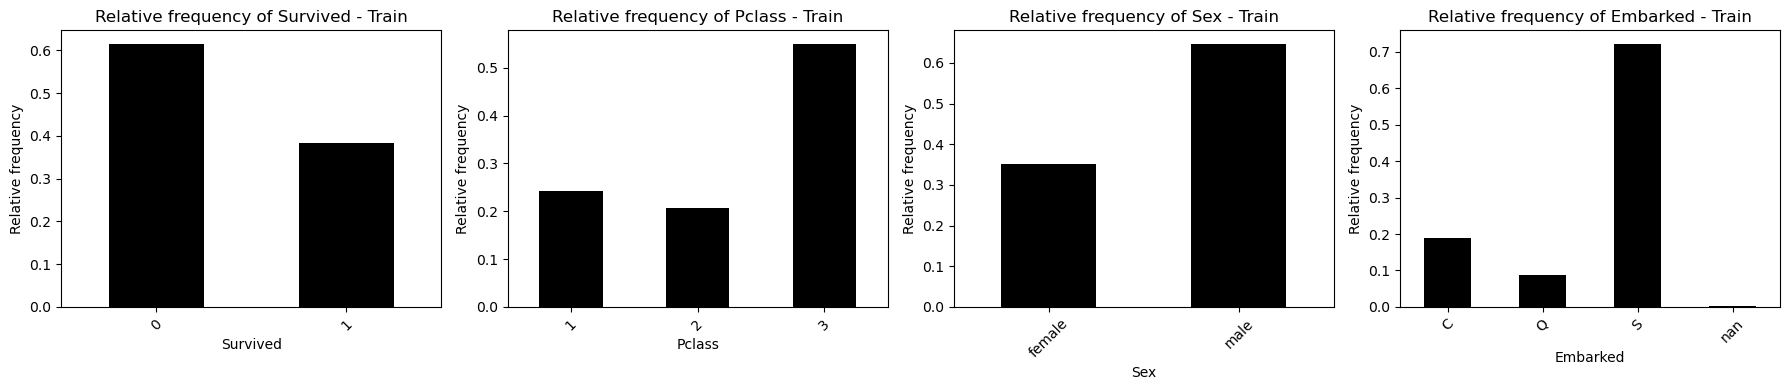

In [20]:
# Bar plots for categorical variables - TRAIN
for i in range(0, len(categorical_cols_train), 4):
    subset = categorical_cols_train[i:i+4]
    
    fig, axes = plt.subplots(1, 4, figsize=(18,4))
    
    for ax, col in zip(axes, subset):
        (train[col]
         .value_counts(dropna=False, normalize=True)
         .sort_index()
         .plot(kind="bar", ax=ax, color="black"))
        
        ax.set_title(f"Relative frequency of {col} - Train")
        ax.set_xlabel(col)
        ax.set_ylabel("Relative frequency")
        ax.tick_params(axis="x", rotation=45)

    
    for ax in axes[len(subset):]:
        ax.axis("off")
    
    plt.tight_layout()
    plt.show()

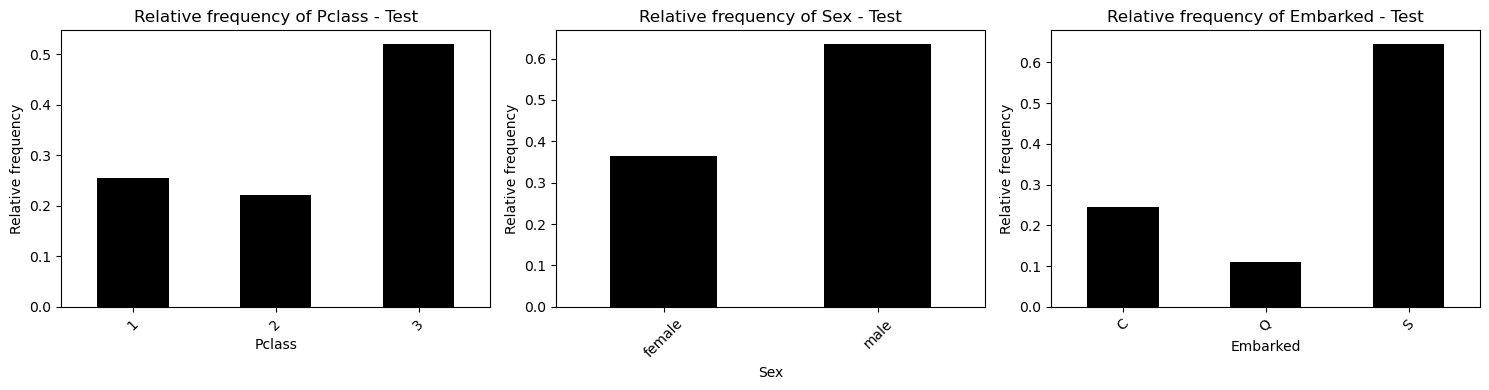

In [21]:
# Bar plots for categorical variables - TEST
for i in range(0, len(categorical_cols_test), 3):
    subset = categorical_cols_test[i:i+3]
    
    fig, axes = plt.subplots(1, 3, figsize=(15,4))
    
    for ax, col in zip(axes, subset):
        (test[col]
         .value_counts(dropna=False, normalize=True)
         .sort_index()
         .plot(kind="bar", ax=ax, color="black"))
        
        ax.set_title(f"Relative frequency of {col} - Test")
        ax.set_xlabel(col)
        ax.set_ylabel("Relative frequency")
        ax.tick_params(axis="x", rotation=45)

    for ax in axes[len(subset):]:
        ax.axis("off")
    
    plt.tight_layout()
    plt.show()

The univariate analysis of categorical variables was conducted using two complementary approaches:  
(i) a summary table including the mode and the number of categories, and  
(ii) bar plots of relative frequencies for each variable in both the training and test datasets.

From the summary tables, it can be observed that:

- All categorical variables have a small and well defined number of categories, which facilitates interpretation and later preprocessing.
- The most frequent categories are consistent between train and test:
  - **Survived** (train only): 0 (did not survive).
  - **Pclass**: 3 (third class).
  - **Sex**: male.
  - **Embarked**: S.

From the relative frequency bar plots, the following patterns are evident:

- The overall distribution of categories is broadly similar between train and test, suggesting that the test set is representative of the training data in terms of categorical structure.
- There is a clear imbalance in several variables in both datasets:
  - **Sex** shows a higher proportion of males.
  - **Pclass** is dominated by third class passengers.
  - For **Embarked**, category **S** is clearly the most frequent in both train and test, while **C** and **Q** are much less represented.

These consistent patterns across train and test provide a solid basis for subsequent analysis and for decisions in later preprocessing steps.


<h4 style="color:#F97316;"><b>6.2 Discrete Numerical variables </b></h4>

In [22]:
discrete_cols = ["SibSp", "Parch"]

# Function to count outliers using the IQR method
def count_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return ((series < lower_bound) | (series > upper_bound)).sum()

# Summary statistics table for discrete variables - TRAIN
disc_stats = pd.DataFrame(index=discrete_cols)
disc_stats["min"] = train[discrete_cols].min()
disc_stats["Q1"] = train[discrete_cols].quantile(0.25)
disc_stats["median"] = train[discrete_cols].median()
disc_stats["Q3"] = train[discrete_cols].quantile(0.75)
disc_stats["max"] = train[discrete_cols].max()
disc_stats["range"] = disc_stats["max"] - disc_stats["min"]
disc_stats["mean"] = train[discrete_cols].mean()
disc_stats["mode"] = train[discrete_cols].mode().iloc[0]
disc_stats["n_unique"] = train[discrete_cols].nunique()
disc_stats["outliers"] = train[discrete_cols].apply(count_outliers)
disc_stats

,min,Q1,median,Q3,max,range,mean,mode,n_unique,outliers
SibSp,0,0.0,0.0,1.0,8,8,0.523008,0,7,46
Parch,0,0.0,0.0,0.0,6,6,0.381594,0,7,213


In [23]:
# Summary statistics table for discrete variables - TEST
disc_stats_test = pd.DataFrame(index=discrete_cols)
disc_stats_test["min"] = test[discrete_cols].min()
disc_stats_test["Q1"] = test[discrete_cols].quantile(0.25)
disc_stats_test["median"] = test[discrete_cols].median()
disc_stats_test["Q3"] = test[discrete_cols].quantile(0.75)
disc_stats_test["max"] = test[discrete_cols].max()
disc_stats_test["range"] = disc_stats_test["max"] - disc_stats_test["min"]
disc_stats_test["mean"] = test[discrete_cols].mean()
disc_stats_test["mode"] = test[discrete_cols].mode().iloc[0]
disc_stats_test["n_unique"] = test[discrete_cols].nunique()
disc_stats_test["outliers"] = test[discrete_cols].apply(count_outliers)
disc_stats_test

,min,Q1,median,Q3,max,range,mean,mode,n_unique,outliers
SibSp,0,0.0,0.0,1.0,8,8,0.447368,0,7,11
Parch,0,0.0,0.0,0.0,9,9,0.392344,0,8,94


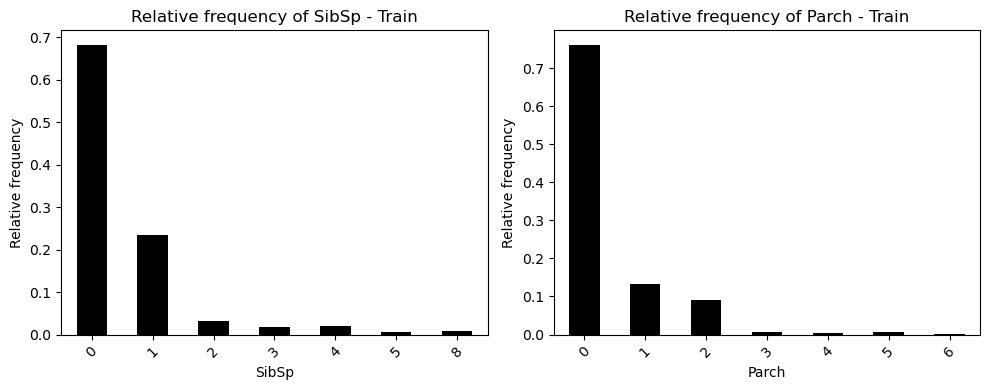

In [24]:
# Bar plots of relative frequencies (train dataset)
for i in range(0, len(discrete_cols), 2):
    subset = discrete_cols[i:i+2]

    fig, axes = plt.subplots(1, 2, figsize=(10,4))

    for ax, col in zip(axes, subset):
        (train[col]
         .value_counts(dropna=False, normalize=True)
         .sort_index()
         .plot(kind="bar", ax=ax, color="black"))

        ax.set_title(f"Relative frequency of {col} - Train")
        ax.set_xlabel(col)
        ax.set_ylabel("Relative frequency")
        ax.tick_params(axis="x", rotation=45)
        
    for ax in axes[len(subset):]:
        ax.axis("off")

    plt.tight_layout()
    plt.show()

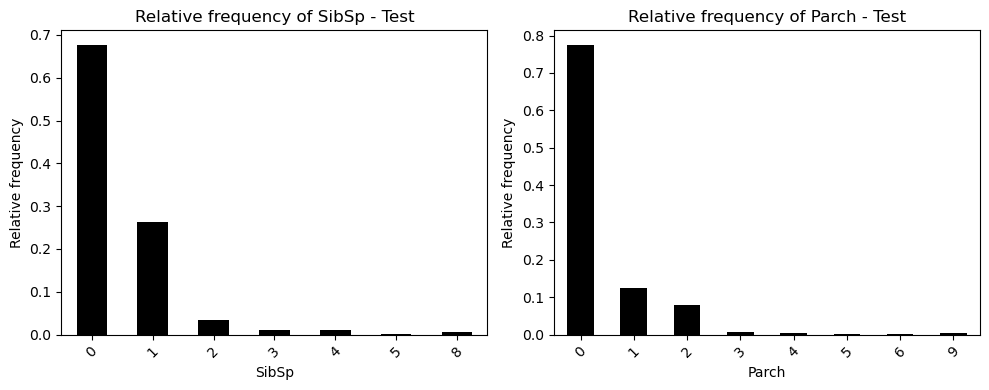

In [25]:
# Bar plots of relative frequencies (test dataset)
for i in range(0, len(discrete_cols), 2):
    subset = discrete_cols[i:i+2]

    fig, axes = plt.subplots(1, 2, figsize=(10,4))

    for ax, col in zip(axes, subset):
        (test[col]
         .value_counts(dropna=False, normalize=True)
         .sort_index()
         .plot(kind="bar", ax=ax, color="black"))

        ax.set_title(f"Relative frequency of {col} - Test")
        ax.set_xlabel(col)
        ax.set_ylabel("Relative frequency")
        ax.tick_params(axis="x", rotation=45)

    for ax in axes[len(subset):]:
        ax.axis("off")

    plt.tight_layout()
    plt.show()

The univariate analysis of the discrete numerical variables SibSp and Parch was conducted using summary statistics and bar plots of relative frequencies for both the training and test datasets.

From the summary tables, the following patterns can be observed:

#### SibSp
- The variable ranges from 0 to 8 in both train and test, indicating comparable coverage.
- The median is 0 in both datasets, showing that most passengers did not travel with siblings or spouses.
- The mean is slightly higher in the training set than in the test set, but the difference is small.
- The number of unique values is the same in both datasets, suggesting similar structural variability.
- A notable number of outliers were detected in both train and test using the IQR method, reflecting the presence of rare higher counts.

#### Parch
- The variable ranges from 0 to 6 in train and up to 9 in test, but the distribution is still dominated by low values.
- The median is 0 in both datasets, indicating that most passengers did not travel with parents or children.
- The mean is slightly higher in the test set, but remains low overall.
- The number of unique values is very similar between train and test.
- A substantial number of outliers were identified, particularly in the training set, which is expected given the concentration of values at 0 and a few rare higher counts.

From the relative frequency bar plots, it is clear that:
- Both SibSp and Parch are heavily concentrated at 0 in train and test.
- The distributions of these variables are very similar across datasets, supporting their comparability.
- Higher values are progressively rarer, reinforcing their discrete and highly skewed nature.

Overall, the discrete numerical variables show consistent patterns between train and test. Their strong concentration at 0 and the presence of rare higher values should be considered in later preprocessing and modeling decisions.


<h4 style="color:#F97316;"><b>6.3 Continuous Numerical variables </b></h4>

In [26]:
numerical_cols = ["Age", "Fare"]

# Create summary statistics table for numerical variables in train
num_stats = pd.DataFrame(index=numerical_cols)
num_stats["min"] = train[numerical_cols].min()
num_stats["Q1"] = train[numerical_cols].quantile(0.25)
num_stats["Q2"] = train[numerical_cols].median()
num_stats["Q3"] = train[numerical_cols].quantile(0.75)
num_stats["max"] = train[numerical_cols].max()
num_stats["range"] = num_stats["max"] - num_stats["min"]
num_stats["mean"] = train[numerical_cols].mean()
num_stats["std"] = train[numerical_cols].std()
# Kurtosis and skewness ignoring NaN values
num_stats["kurtosis"] = train[numerical_cols].apply(lambda x: kurtosis(x, nan_policy="omit"))
num_stats["skewness"] = train[numerical_cols].apply(lambda x: skew(x, nan_policy="omit"))
num_stats["outliers"] = train[numerical_cols].apply(count_outliers)
num_stats

,min,Q1,Q2,Q3,max,range,mean,std,kurtosis,skewness,outliers
Age,0.42,20.1250,28.0000,38.0,80.0000,79.5800,29.699118,14.526497,0.168637,0.388290,11
Fare,0.00,7.9104,14.4542,31.0,512.3292,512.3292,32.204208,49.693429,33.204289,4.779253,116


In [27]:
# Create summary statistics table for numerical variables in test
num_stats_test = pd.DataFrame(index=numerical_cols)
num_stats_test["min"] = test[numerical_cols].min()
num_stats_test["Q1"] = test[numerical_cols].quantile(0.25)
num_stats_test["Q2"] = test[numerical_cols].median()
num_stats_test["Q3"] = test[numerical_cols].quantile(0.75)
num_stats_test["max"] = test[numerical_cols].max()
num_stats_test["range"] = num_stats_test["max"] - num_stats_test["min"]
num_stats_test["mean"] = test[numerical_cols].mean()
num_stats_test["std"] = test[numerical_cols].std()
# Kurtosis and skewness ignoring NaN values
num_stats_test["kurtosis"] = test[numerical_cols].apply(lambda x: kurtosis(x, nan_policy="omit"))
num_stats_test["skewness"] = test[numerical_cols].apply(lambda x: skew(x, nan_policy="omit"))
num_stats_test["outliers"] = test[numerical_cols].apply(count_outliers)
num_stats_test

,min,Q1,Q2,Q3,max,range,mean,std,kurtosis,skewness,outliers
Age,0.17,21.0000,27.0000,39.0,76.0000,75.8300,30.272590,14.181209,0.064509,0.455292,2
Fare,0.00,7.8958,14.4542,31.5,512.3292,512.3292,35.627188,55.907576,17.693074,3.673937,55


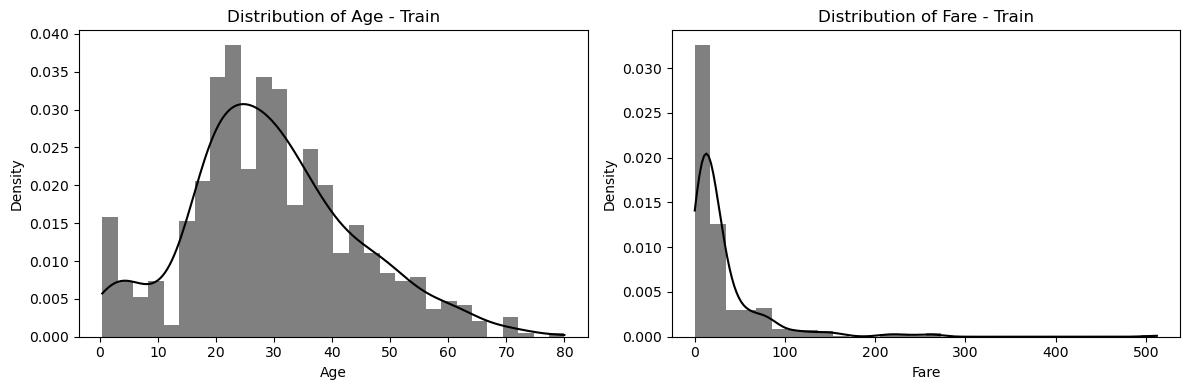

In [28]:
# Histograms for numerical variables - train
fig, axes = plt.subplots(1, 2, figsize=(12,4))

for ax, col in zip(axes, numerical_cols):
    data = train[col].dropna()
    ax.hist(data, bins=30, density=True, color="gray")
    
    # Density curve (KDE)
    kde = gaussian_kde(data)
    x = np.linspace(data.min(), data.max(), 200)
    ax.plot(x, kde(x), color="black")
    
    ax.set_title(f"Distribution of {col} - Train")
    ax.set_xlabel(col)
    ax.set_ylabel("Density")

plt.tight_layout()
plt.show()

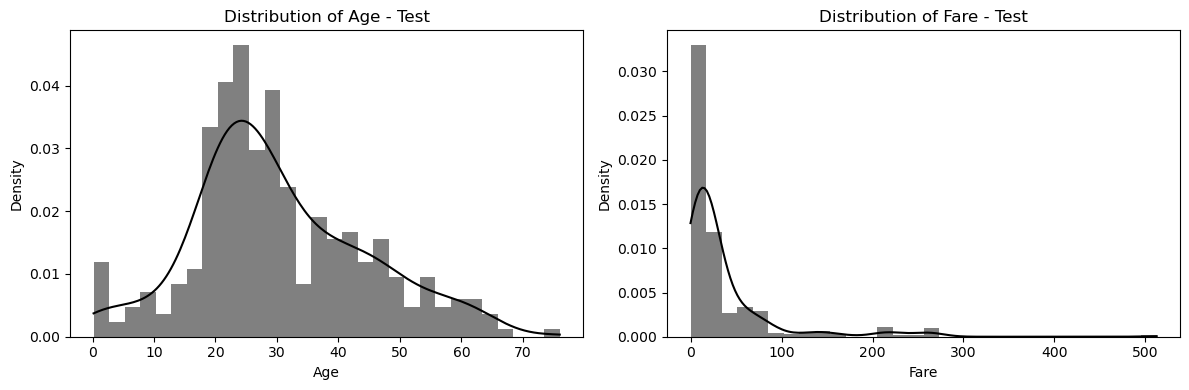

In [29]:
# Histograms for numerical variables - Test
fig, axes = plt.subplots(1, 2, figsize=(12,4))

for ax, col in zip(axes, numerical_cols):
    data = test[col].dropna()
    ax.hist(data, bins=30, density=True, color="gray")
    
    # Density curve (KDE)
    kde = gaussian_kde(data)
    x = np.linspace(data.min(), data.max(), 200)
    ax.plot(x, kde(x), color="black")
    
    ax.set_title(f"Distribution of {col} - Test")
    ax.set_xlabel(col)
    ax.set_ylabel("Density")

plt.tight_layout()
plt.show()

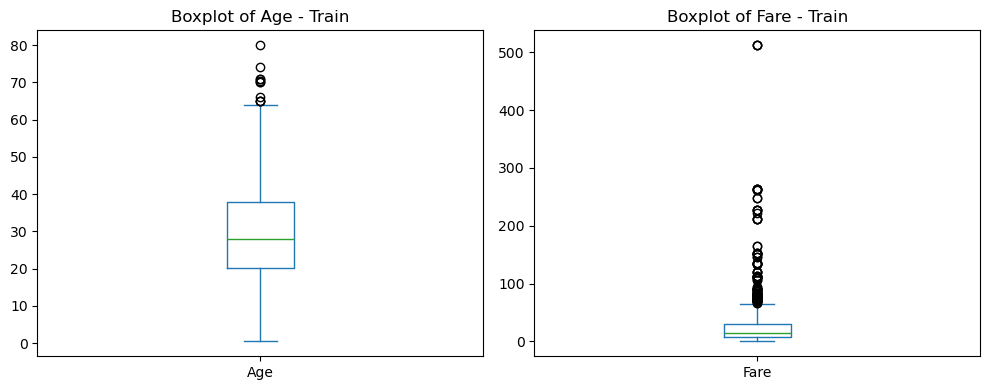

In [30]:
# Boxplot for numerical variables - Train
fig, axes = plt.subplots(1, 2, figsize=(10,4))

for ax, col in zip(axes, numerical_cols):
    train[col].plot(kind="box", ax=ax)
    ax.set_title(f"Boxplot of {col} - Train")

plt.tight_layout()
plt.show()

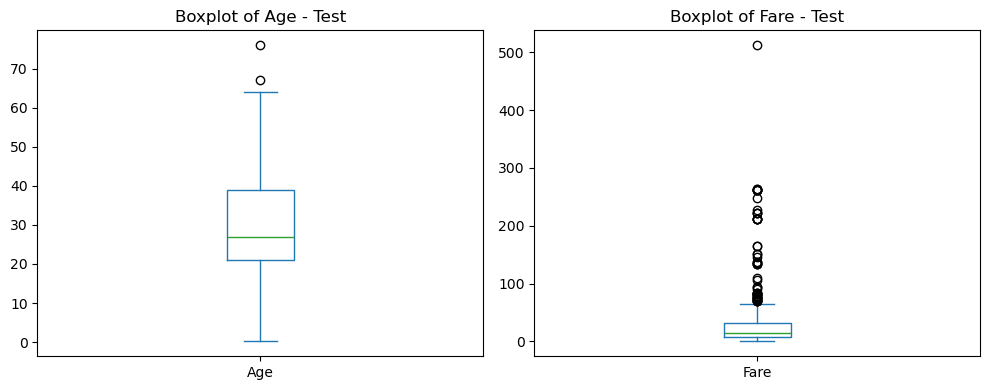

In [31]:
# Boxplot for numerical variables - Test
fig, axes = plt.subplots(1, 2, figsize=(10,4))

for ax, col in zip(axes, numerical_cols):
    test[col].plot(kind="box", ax=ax)
    ax.set_title(f"Boxplot of {col} - Test")

plt.tight_layout()
plt.show()

The univariate analysis of continuous numerical variables (Age and Fare) was based on descriptive statistics, outlier detection using the IQR method, and visual inspection through histograms and boxplots for both the training and test datasets.

From the summary tables and visualizations, the following patterns were observed:

#### Age
- The range of Age is similar in train and test, indicating comparable coverage of passenger ages.
- The median age is slightly higher in the test set, but the overall central tendency and variability are consistent across both datasets.
- The distribution of Age appears moderately right skewed, as reflected in both the histogram and the positive skewness values.
- The kurtosis values suggest a distribution slightly more peaked than a normal distribution.
- A moderate number of outliers were detected in both train and test, which is visible in the boxplots, particularly at higher ages.

#### Fare
- The range of Fare is identical in both datasets, with very high maximum values in comparison to the median.
- The distribution of Fare is highly right skewed, which is evident in the histograms and confirmed by the high skewness values.
- The standard deviation is large relative to the mean, indicating substantial dispersion in ticket prices.
- A significant number of outliers were detected in both train and test, as shown in the boxplots, reflecting the presence of extremely high fares for a small number of passengers.

Overall, the numerical distributions of Age and Fare are broadly consistent between train and test, supporting their comparability for subsequent analysis and modeling. The presence of skewness and outliers, particularly in Fare, should be considered in later preprocessing and modeling decisions.

<h4 style="color:#F97316;"><b>6.4 Text variables </b></h4>

In [32]:
text_cols = ["Name", "Ticket", "Cabin"]

print("\n==================== TRAIN DATASET ====================")

# Representative examples - TRAIN
for col in text_cols:
    display(train[[col]].head(10))


==================== TRAIN DATASET ====================


,Name
PassengerId,
1,"Braund, Mr. Owen Harris"
2,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
3,"Heikkinen, Miss. Laina"
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
5,"Allen, Mr. William Henry"
6,"Moran, Mr. James"
7,"McCarthy, Mr. Timothy J"
8,"Palsson, Master. Gosta Leonard"
9,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)"


,Ticket
PassengerId,
1,A/5 21171
2,PC 17599
3,STON/O2. 3101282
4,113803
5,373450
6,330877
7,17463
8,349909
9,347742


,Cabin
PassengerId,
1,NaN
2,C85
3,NaN
4,C123
5,NaN
6,NaN
7,E46
8,NaN
9,NaN


In [33]:
# Representative examples - TEST
print("\n==================== TEST DATASET ====================")

for col in text_cols:
    display(test[[col]].head(10))


==================== TEST DATASET ====================


,Name
PassengerId,
892,"Kelly, Mr. James"
893,"Wilkes, Mrs. James (Ellen Needs)"
894,"Myles, Mr. Thomas Francis"
895,"Wirz, Mr. Albert"
896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)"
897,"Svensson, Mr. Johan Cervin"
898,"Connolly, Miss. Kate"
899,"Caldwell, Mr. Albert Francis"
900,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)"


,Ticket
PassengerId,
892,330911
893,363272
894,240276
895,315154
896,3101298
897,7538
898,330972
899,248738
900,2657


,Cabin
PassengerId,
892,NaN
893,NaN
894,NaN
895,NaN
896,NaN
897,NaN
898,NaN
899,NaN
900,NaN


In [34]:
# Representative examples (random) - TRAIN
print("\n==================== TRAIN DATASET ====================")
for col in text_cols:
    display(train[[col]].sample(10, random_state=42))


==================== TRAIN DATASET ====================


,Name
PassengerId,
710,"Moubarek, Master. Halim Gonios (""William George"")"
440,"Kvillner, Mr. Johan Henrik Johannesson"
841,"Alhomaki, Mr. Ilmari Rudolf"
721,"Harper, Miss. Annie Jessie ""Nina"""
40,"Nicola-Yarred, Miss. Jamila"
291,"Barber, Miss. Ellen ""Nellie"""
301,"Kelly, Miss. Anna Katherine ""Annie Kate"""
334,"Vander Planke, Mr. Leo Edmondus"
209,"Carr, Miss. Helen ""Ellen"""


,Ticket
PassengerId,
710,2661
440,C.A. 18723
841,SOTON/O2 3101287
721,248727
40,2651
291,19877
301,9234
334,345764
209,367231


,Cabin
PassengerId,
710,NaN
440,NaN
841,NaN
721,NaN
40,NaN
291,NaN
301,NaN
334,NaN
209,NaN


In [35]:
# Representative examples (random) - Test
print("\n==================== TEST DATASET ====================")
for col in text_cols:
    display(test[[col]].sample(10, random_state=42))


==================== TEST DATASET ====================


,Name
PassengerId,
1213,"Krekorian, Mr. Neshan"
1216,"Kreuchen, Miss. Emilie"
1280,"Canavan, Mr. Patrick"
948,"Cor, Mr. Bartol"
1045,"Klasen, Mrs. (Hulda Kristina Eugenia Lofqvist)"
922,"Louch, Mr. Charles Alexander"
964,"Nieminen, Miss. Manta Josefina"
974,"Case, Mr. Howard Brown"
1150,"Bentham, Miss. Lilian W"


,Ticket
PassengerId,
1213,2654
1216,24160
1280,364858
948,349230
1045,350405
922,SC/AH 3085
964,3101297
974,19924
1150,28404


,Cabin
PassengerId,
1213,F E57
1216,NaN
1280,NaN
948,NaN
1045,NaN
922,NaN
964,NaN
974,NaN
1150,NaN


In [36]:
# Extract Title from Name - TRAIN and TEST
train["Title"] = train["Name"].str.extract(r"([A-Za-z]+)\.")
test["Title"] = test["Name"].str.extract(r"([A-Za-z]+)\.")

# Check most frequent titles
print("Top Titles - Train:")
print(train["Title"].value_counts().head(10))
print("\nTop Titles - Test:")
print(test["Title"].value_counts().head(10))

Top Titles - Train:
Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Name: count, dtype: int64

Top Titles - Test:
Title
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64


In [37]:
# Show the 15 most frequent tickets (train dataset)
train["Ticket"].value_counts().head(15)

Ticket
347082          7
CA. 2343        7
1601            7
3101295         6
CA 2144         6
347088          6
S.O.C. 14879    5
382652          5
LINE            4
PC 17757        4
17421           4
349909          4
113760          4
4133            4
113781          4
Name: count, dtype: int64

In [38]:
# Summary statistics of ticket frequencies (train dataset)
train["Ticket"].value_counts().describe()

count    681.000000
mean       1.308370
std        0.792652
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        7.000000
Name: count, dtype: float64

In [39]:
# Show the 15 most frequent tickets (test dataset)
test["Ticket"].value_counts().head(15)

Ticket
PC 17608              5
CA. 2343              4
113503                4
PC 17483              3
220845                3
347077                3
SOTON/O.Q. 3101315    3
C.A. 31029            3
16966                 3
230136                2
C.A. 33112            2
28220                 2
PC 17756              2
29103                 2
347072                2
Name: count, dtype: int64

In [40]:
# Summary statistics of ticket frequencies (test dataset)
test["Ticket"].value_counts().describe()

count    363.000000
mean       1.151515
std        0.477871
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        5.000000
Name: count, dtype: float64

In [41]:
# Extract cabin deck from Cabin and check its distribution including missing values (train dataset)
train["Cabin_deck"] = train["Cabin"].str[0]
train["Cabin_deck"].value_counts(dropna=False)

Cabin_deck
NaN    687
C       59
B       47
D       33
E       32
A       15
F       13
G        4
T        1
Name: count, dtype: int64

In [42]:
# Extract cabin deck from Cabin and check its distribution including missing values (test dataset)
test["Cabin_deck"] = test["Cabin"].str[0]
test["Cabin_deck"].value_counts(dropna=False)

Cabin_deck
NaN    327
C       35
B       18
D       13
E        9
F        8
A        7
G        1
Name: count, dtype: int64



The univariate analysis of text variables (Name, Ticket, and Cabin) focused on their structure, cardinality, missing values, and the extraction of meaningful information through feature engineering.

##### Name and extracted Title

- The variable **Name** shows very high cardinality, with most values being unique identifiers for passengers.  
  As such, it is not directly suitable for statistical analysis in its raw form.

- To extract useful information, a new variable **Title** was created from Name using a regular expression.  
  This transformation successfully captured social titles such as Mr, Mrs, Miss, and Master.

- The most frequent titles are consistent between train and test, with **Mr, Miss, Mrs, and Master** being dominant in both datasets.  
  This indicates that the extracted feature is stable and comparable across datasets.

- The presence of many rare titles justifies the potential need for grouping them into an "Other" category in later preprocessing steps.
##### Ticket

- The variable **Ticket** also exhibits high cardinality, with most ticket numbers appearing only once or a few times.  
  The descriptive statistics of ticket frequencies show:
  - A mean close to 1,
  - A maximum of 7 repeated tickets in train and 5 in test,
  - Low variability in frequency counts overall.

- This suggests that Ticket in its raw form has limited direct interpretability.  
  However, repeated tickets may indicate travel groups or family relationships, which could be explored later through feature engineering.

##### Cabin and extracted Cabin_deck

- The variable **Cabin** contains a very high proportion of missing values in both train and test, making it unreliable in its raw form.

- To extract meaningful information, the first letter of Cabin was used to create a new categorical variable **Cabin_deck**.

- The distribution of Cabin_deck shows:
  - A dominant category of missing values,
  - Followed by decks B, C, D, and E as the most frequent among non missing entries.

- This confirms that while Cabin in its original form is problematic, Cabin_deck retains potentially useful information that can be analyzed further.



Raw text variables (Name, Ticket, and Cabin) are not suitable for direct statistical analysis due to high cardinality and missing values.  
However, feature engineering (Title and Cabin_deck) successfully converted unstructured text into meaningful categorical variables that can be included in subsequent analyses and modeling steps.


<h3 style="color:#F97316;"><b>7. Multivariate analysis</b></h3>

In this section, relationships between variables were explored to understand how different attributes interact with each other and how they relate to passenger survival.

- **7.1 Variables vs Target:** relationships between each explanatory variable and the target variable were examined using comparative visualizations and summary measures to identify patterns associated with survival.  
- **7.2 Variables vs Variables:** associations between pairs of variables were analyzed through correlation measures for numerical attributes and contingency based approaches for categorical attributes.  
- **7.3 Multivariate analysis of categorical variables (MCA):** multiple categorical variables were analyzed simultaneously using Multiple Correspondence Analysis to identify underlying structures and relationships between categories.  


<h4 style="color:#F97316;"><b>7.1 Variables vs Target</b></h4>

<h5>7.1.1 Categorical variables vs Target</h5>

In [43]:
train["Survived"] = train["Survived"].astype(int)
cat_vs_target = ["Sex", "Pclass", "Embarked", "Title", "Cabin_deck"]

In [44]:
survival_tables = {}
# Compute survival statistics by categorical variable (including missing values) - Train dataset
for col in cat_vs_target:
    df = (
        train
        .groupby(col, dropna=False, observed=True)["Survived"]
        .agg(
            Survival_proportion="mean",
            N_survived=lambda x: (x == 1).sum(),
            N_not_survived=lambda x: (x == 0).sum(),
            N_total="count"
        )
        .sort_values("Survival_proportion", ascending=False)
    )

    
    df.index = df.index.fillna("Missing")

    survival_tables[col] = df


for col in cat_vs_target:
    print(f"\n--- Survival statistics by {col} ---")
    display(survival_tables[col])


--- Survival statistics by Sex ---


,Survival_proportion,N_survived,N_not_survived,N_total
Sex,,,,
female,0.742038,233,81,314
male,0.188908,109,468,577



--- Survival statistics by Pclass ---


,Survival_proportion,N_survived,N_not_survived,N_total
Pclass,,,,
1,0.629630,136,80,216
2,0.472826,87,97,184
3,0.242363,119,372,491



--- Survival statistics by Embarked ---


,Survival_proportion,N_survived,N_not_survived,N_total
Embarked,,,,
Missing,1.000000,2,0,2
C,0.553571,93,75,168
Q,0.389610,30,47,77
S,0.336957,217,427,644



--- Survival statistics by Title ---


,Survival_proportion,N_survived,N_not_survived,N_total
Title,,,,
Sir,1.000000,1,0,1
Countess,1.000000,1,0,1
Ms,1.000000,1,0,1
Mme,1.000000,1,0,1
Lady,1.000000,1,0,1
Mlle,1.000000,2,0,2
Mrs,0.792000,99,26,125
Miss,0.697802,127,55,182
Master,0.575000,23,17,40



--- Survival statistics by Cabin_deck ---


,Survival_proportion,N_survived,N_not_survived,N_total
Cabin_deck,,,,
D,0.757576,25,8,33
E,0.750000,24,8,32
B,0.744681,35,12,47
F,0.615385,8,5,13
C,0.593220,35,24,59
G,0.500000,2,2,4
A,0.466667,7,8,15
Missing,0.299854,206,481,687
T,0.000000,0,1,1


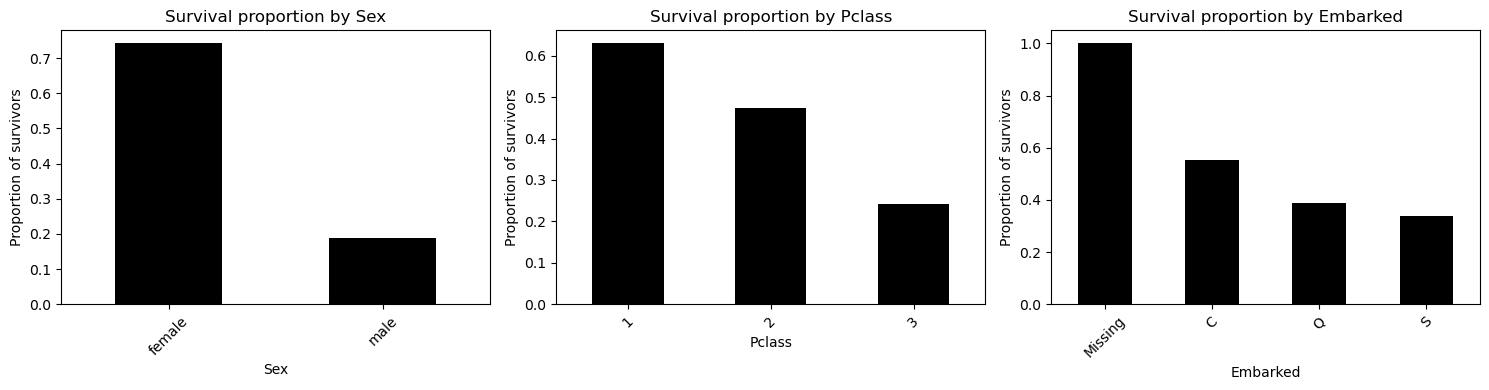

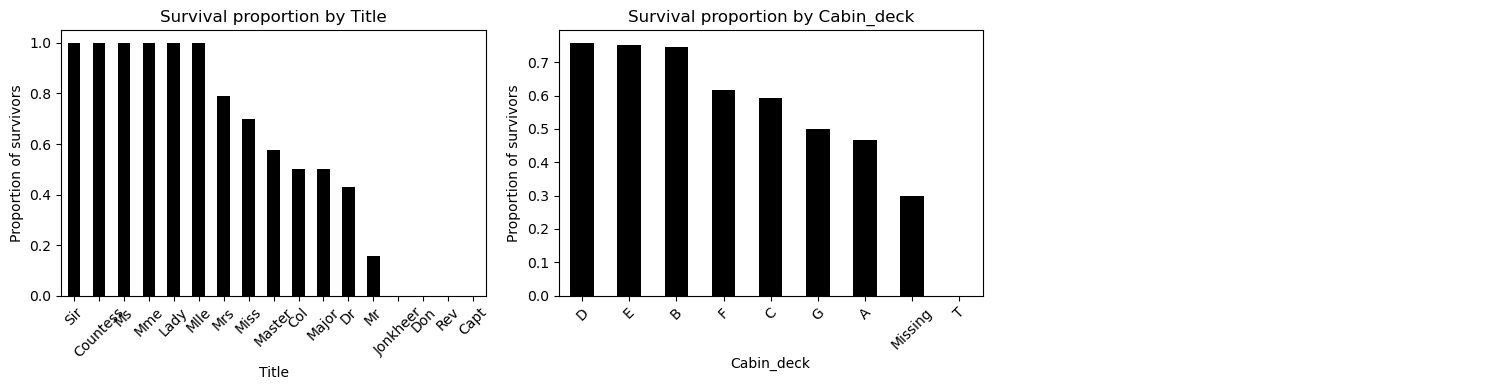

In [45]:
# Plot survival proportions for categorical variables
for i in range(0, len(cat_vs_target), 3):
    subset = cat_vs_target[i:i+3]
    fig, axes = plt.subplots(1, 3, figsize=(15,4))

    for ax, col in zip(axes, subset):
        survival_tables[col]["Survival_proportion"].plot(kind="bar", ax=ax, color="black")
        ax.set_title(f"Survival proportion by {col}")
        ax.set_xlabel(col)
        ax.set_ylabel("Proportion of survivors")
        ax.tick_params(axis="x", rotation=45)

    for ax in axes[len(subset):]:
        ax.axis("off")

    plt.tight_layout()
    plt.show()

In [46]:
# Compute Cramér's V and related statistics for two categorical variables
def cramers_v(x, y):
    """
    Computes Cramér's V for association between two categorical variables.
    """
    contingency = pd.crosstab(x, y)
    chi2, p, dof, expected = chi2_contingency(contingency)
    n = contingency.values.sum()
    phi2 = chi2 / n
    r, k = contingency.shape
    v = np.sqrt(phi2 / min(r - 1, k - 1))
    return v, chi2, p, contingency

In [47]:
results_cramers = {}
# Compute Cramér's V, chi-square, and p-values for each categorical variable vs Survived
for col in cat_vs_target:
    v, chi2, p, table = cramers_v(train[col], train["Survived"])
    results_cramers[col] = {
        "Cramers_V": v,
        "Chi2": chi2,
        "p_value": p
    }
cramers_df = pd.DataFrame(results_cramers).T
cramers_df

,Cramers_V,Chi2,p_value
Sex,0.540936,260.717020,1.197357e-58
Pclass,0.339817,102.888989,4.549252e-23
Embarked,0.172617,26.489150,1.769922e-06
Title,0.580281,300.023021,2.522768e-54
Cabin_deck,0.224706,10.300556,1.721713e-01


This section examines the relationship between categorical variables and the target variable (Survived) using survival proportions and measures of association. Survival proportions provide an intuitive comparison across categories, while Phi and Cramér’s V quantify the strength of association.

##### Sex vs Survived (Phi = 0.54, p < 0.001)

There is a clear and substantial difference in survival probability between males and females. Female passengers exhibit a much higher survival rate (approximately 0.74) compared to male passengers (approximately 0.19). The Phi coefficient of 0.54 indicates a moderate to strong and statistically significant association between Sex and Survived. This suggests that Sex is one of the most relevant predictors of survival.

##### Pclass vs Survived (Cramér’s V = 0.34, p < 0.001)

Survival probability decreases consistently from first to third class. Passengers in first class show the highest survival rate (approximately 0.63), followed by second class (0.47), and third class (0.24). Cramér’s V of 0.34 indicates a moderate and statistically significant association between Pclass and Survived. This confirms that socioeconomic status, as captured by Pclass, plays an important role in survival.

##### Embarked vs Survived (Cramér’s V = 0.17, p < 0.001)

Passengers who embarked in C exhibit the highest survival proportion, while those who embarked in S show the lowest among known ports. Although the “Missing” category shows a survival rate of 1.0, this result is based on very few observations and should not be interpreted as a meaningful pattern. The Cramér’s V value of 0.17 indicates a weak but statistically significant association between Embarked and Survived, suggesting that this variable has limited predictive power compared to Sex and Pclass.

##### Title vs Survived (Cramér’s V = 0.58, p < 0.001)

The extracted Title variable shows a strong association with survival. Titles such as Lady, Countess, Mme, Ms, and Sir are associated with very high survival rates, while Mr has a much lower survival probability. Rare titles such as Rev, Don, Capt, and Jonkheer show no survivors. The Cramér’s V value of 0.58 indicates a strong and statistically significant association, highlighting that Title effectively captures social and demographic information relevant to survival.

##### Cabin_deck vs Survived (Cramér’s V = 0.22, p = 0.17)

Cabin_deck shows some variation in survival proportions, with decks D, E, and B having the highest rates. However, the association with Survived is weak and not statistically significant at the 5 percent level (Cramér’s V = 0.22, p = 0.17). This suggests that, on its own, Cabin_deck does not provide strong explanatory power for survival.


Among the categorical variables, Title and Sex exhibit the strongest relationships with Survived, followed by Pclass with a moderate association. Embarked and Cabin_deck show weaker and less consistent relationships. These findings indicate that social status and gender related features are the most informative for explaining survival outcomes in the Titanic dataset.


<h5>7.1.2 Continuous numerical variables vs Target</h5>

In [48]:
continuous_cols = ["Age", "Fare"]

# Create descriptive statistics separately for each variable
desc_age = (train.groupby("Survived")["Age"].agg(N="count",min="min",Q1=lambda x: x.quantile(0.25),Q2="median",Q3=lambda x: x.quantile(0.75),max="max",mean="mean",std="std"))

desc_fare = (train.groupby("Survived")["Fare"].agg(N="count",min="min",Q1=lambda x: x.quantile(0.25),Q2="median",Q3=lambda x: x.quantile(0.75),max="max",mean="mean",std="std"))


print("\n=== Descriptive statistics: Age by Survived ===")
display(desc_age)

print("\n=== Descriptive statistics: Fare by Survived ===")
display(desc_fare)


=== Descriptive statistics: Age by Survived ===


,N,min,Q1,Q2,Q3,max,mean,std
Survived,,,,,,,,
0,424,1.00,21.0,28.0,39.0,74.0,30.626179,14.172110
1,290,0.42,19.0,28.0,36.0,80.0,28.343690,14.950952



=== Descriptive statistics: Fare by Survived ===


,N,min,Q1,Q2,Q3,max,mean,std
Survived,,,,,,,,
0,549,0.0,7.8542,10.5,26.0,263.0000,22.117887,31.388207
1,342,0.0,12.4750,26.0,57.0,512.3292,48.395408,66.596998


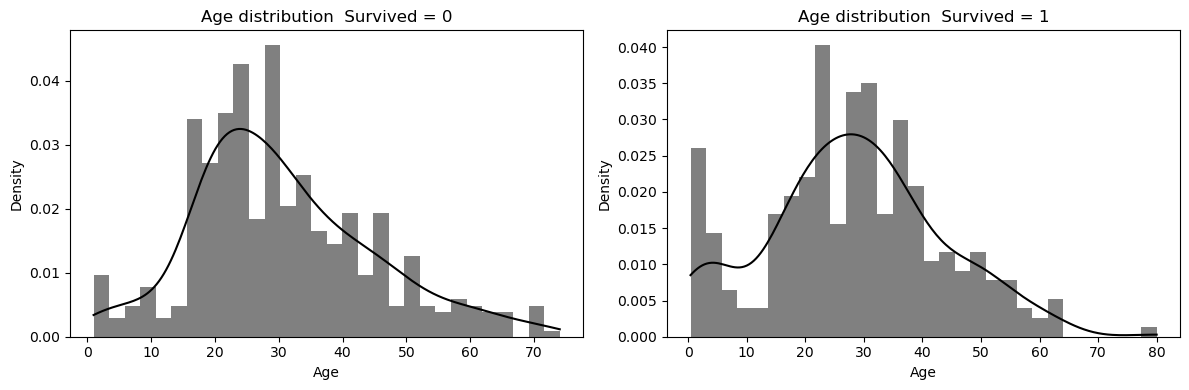

In [49]:
# Compare age distributions for survivors and non-survivors using histograms and KDE
fig, axes = plt.subplots(1, 2, figsize=(12,4))

# ---- Survived = 0 ----
data0 = train.loc[train["Survived"] == 0, "Age"].dropna()
axes[0].hist(data0, bins=30, density=True, color="gray")
kde0 = gaussian_kde(data0)
x0 = np.linspace(data0.min(), data0.max(), 200)
axes[0].plot(x0, kde0(x0), color="black")
axes[0].set_title("Age distribution  Survived = 0")
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Density")

# ---- Survived = 1 ----
data1 = train.loc[train["Survived"] == 1, "Age"].dropna()
axes[1].hist(data1, bins=30, density=True, color="gray")
kde1 = gaussian_kde(data1)
x1 = np.linspace(data1.min(), data1.max(), 200)
axes[1].plot(x1, kde1(x1), color="black")
axes[1].set_title("Age distribution  Survived = 1")
axes[1].set_xlabel("Age")
axes[1].set_ylabel("Density")

plt.tight_layout()
plt.show()

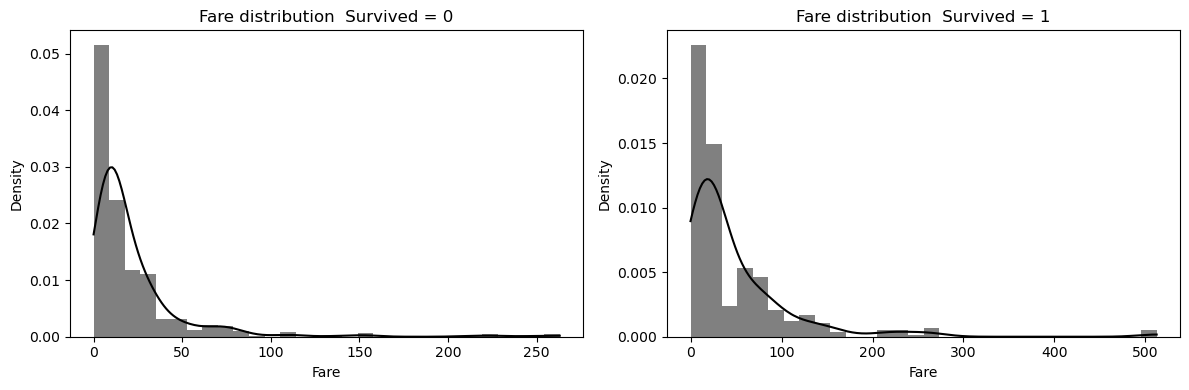

In [50]:
# Compare fare distributions for survivors and non-survivors using histograms and KDE
fig, axes = plt.subplots(1, 2, figsize=(12,4))

# ---- Survived = 0 ----
data0 = train.loc[train["Survived"] == 0, "Fare"].dropna()
axes[0].hist(data0, bins=30, density=True, color="gray")
kde0 = gaussian_kde(data0)
x0 = np.linspace(data0.min(), data0.max(), 200)
axes[0].plot(x0, kde0(x0), color="black")
axes[0].set_title("Fare distribution  Survived = 0")
axes[0].set_xlabel("Fare")
axes[0].set_ylabel("Density")

# ---- Survived = 1 ----
data1 = train.loc[train["Survived"] == 1, "Fare"].dropna()
axes[1].hist(data1, bins=30, density=True, color="gray")
kde1 = gaussian_kde(data1)
x1 = np.linspace(data1.min(), data1.max(), 200)
axes[1].plot(x1, kde1(x1), color="black")
axes[1].set_title("Fare distribution  Survived = 1")
axes[1].set_xlabel("Fare")
axes[1].set_ylabel("Density")

plt.tight_layout()
plt.show()

In [51]:
# Compute point-biserial correlation between Survival and numerical variables
# Remove missing values
age_data = train[["Age", "Survived"]].dropna()
fare_data = train[["Fare", "Survived"]].dropna()

# Calculate correlations
r_age, p_age = pointbiserialr(age_data["Survived"], age_data["Age"])
r_fare, p_fare = pointbiserialr(fare_data["Survived"], fare_data["Fare"])

# Create summary table
point_biserial_table = pd.DataFrame({
    "Variable": ["Age", "Fare"],
    "Point_biserial_r": [r_age, r_fare],
    "p_value": [p_age, p_fare]
})

point_biserial_table

,Variable,Point_biserial_r,p_value
0,Age,-0.077221,3.912465e-02
1,Fare,0.257307,6.120189e-15


This section analyses the relationship between the continuous numerical variables (Age and Fare) and the target variable (Survived). The analysis combines descriptive statistics by survival group, visual inspection of distributions, and point biserial correlation to quantify the strength and direction of association.

##### Age vs Survived

The descriptive statistics show that the mean age of non survivors (30.63 years) is slightly higher than that of survivors (28.34 years), while the medians are identical (28 years). The interquartile range (Q1 to Q3) is also similar between groups, indicating that the overall spread of Age does not differ substantially between survivors and non survivors. However, non survivors exhibit a slightly higher maximum age (74) compared to survivors (80).

The overlaid histograms and density curves suggest broadly similar age distributions for both groups, with a mild right skew in both cases. Visually, there is only a slight shift towards younger ages among survivors, rather than a pronounced separation between the two distributions.

The point biserial correlation between Age and Survived is r = -0.077 (p < 0.05), indicating a very weak negative association. This suggests that younger passengers had a marginally higher probability of survival, but the effect is small and Age alone is not a strong predictor of survival.

##### Fare vs Survived

Fare shows clearer differences between survivors and non survivors. The mean Fare for survivors (48.40) is more than twice that of non survivors (22.12), and the median Fare is also substantially higher for survivors (26.00 versus 10.50). The interquartile range is wider for survivors, and the maximum Fare is considerably higher, indicating greater variability among those who survived.

The histograms reveal a strongly right skewed distribution for both groups, but with a visible shift towards higher Fare values among survivors. This suggests that passengers who paid more for their tickets were more likely to survive.

The point biserial correlation between Fare and Survived is r = 0.257 (p < 0.001), indicating a moderate positive association. This supports the conclusion that higher ticket prices are associated with a higher probability of survival.


Among the continuous numerical variables, Fare shows a clearer and more meaningful relationship with survival than Age. While Age exhibits only a very weak negative association with Survived, Fare displays a moderate positive association, suggesting that socioeconomic factors reflected in ticket price played a more important role in survival outcomes than age alone.


<h5>7.1.3 Discrete numerical variables vs Target</h5>

In [52]:
# Compute survival statistics for discrete numerical variables
discrete_cols = ["SibSp", "Parch"]

survival_tables_discrete = {}

for col in discrete_cols:
    df = (train.groupby(col, dropna=False, observed=True)["Survived"].agg(Survival_proportion="mean",N_survived=lambda x: (x == 1).sum(),N_not_survived=lambda x: (x == 0).sum(),N_total="count").sort_index())

    survival_tables_discrete[col] = df

# Display the tables
for col in discrete_cols:
    print(f"\n--- Survival statistics by {col} ---")
    display(survival_tables_discrete[col])


--- Survival statistics by SibSp ---


,Survival_proportion,N_survived,N_not_survived,N_total
SibSp,,,,
0,0.345395,210,398,608
1,0.535885,112,97,209
2,0.464286,13,15,28
3,0.250000,4,12,16
4,0.166667,3,15,18
5,0.000000,0,5,5
8,0.000000,0,7,7



--- Survival statistics by Parch ---


,Survival_proportion,N_survived,N_not_survived,N_total
Parch,,,,
0,0.343658,233,445,678
1,0.550847,65,53,118
2,0.500000,40,40,80
3,0.600000,3,2,5
4,0.000000,0,4,4
5,0.200000,1,4,5
6,0.000000,0,1,1


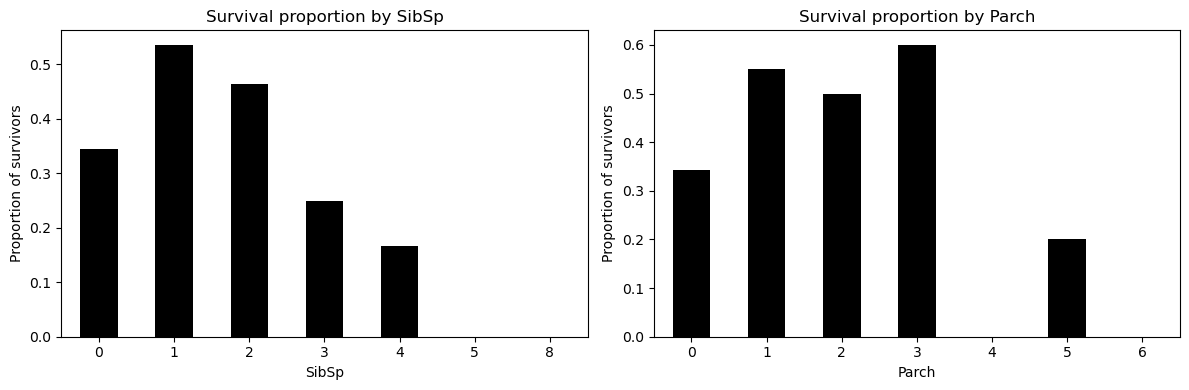

In [53]:
# Plot survival proportions for discrete numerical variables (SibSp and Parch)
fig, axes = plt.subplots(1, 2, figsize=(12,4))

# SibSp
survival_tables_discrete["SibSp"]["Survival_proportion"].plot(
    kind="bar", ax=axes[0], color="black"
)
axes[0].set_title("Survival proportion by SibSp")
axes[0].set_xlabel("SibSp")
axes[0].set_ylabel("Proportion of survivors")
axes[0].tick_params(axis="x", rotation=0)

# Parch
survival_tables_discrete["Parch"]["Survival_proportion"].plot(
    kind="bar", ax=axes[1], color="black"
)
axes[1].set_title("Survival proportion by Parch")
axes[1].set_xlabel("Parch")
axes[1].set_ylabel("Proportion of survivors")
axes[1].tick_params(axis="x", rotation=0)

plt.tight_layout()
plt.show()

In [54]:
# Compute Cramér's V for discrete numerical variables vs Survival
results_cramers_discrete = {}

for col in discrete_cols:
    v, chi2, p, _ = cramers_v(train[col], train["Survived"])
    
    results_cramers_discrete[col] = {
        "Cramers_V": v,
        "Chi2": chi2,
        "p_value": p
    }


cramers_discrete_df = pd.DataFrame(results_cramers_discrete).T
cramers_discrete_df

,Cramers_V,Chi2,p_value
SibSp,0.204527,37.271793,0.000002
Parch,0.177037,27.925784,0.000097


This section analyses the relationship between the discrete numerical variables (SibSp and Parch) and the target variable (Survived). The analysis combines survival proportions by category, visual inspection through bar plots, and Cramér’s V to quantify the strength of association.

##### SibSp vs Survived (Cramér’s V = 0.2045, p < 0.001)

The survival proportions vary notably across different values of SibSp, indicating that the number of siblings or spouses aboard is related to survival probability.

Passengers traveling with one companion (SibSp = 1) exhibit the highest survival rate (approximately 0.54), followed by those with two companions (0.46). In contrast, passengers traveling alone (SibSp = 0) have a lower survival rate (0.35). Survival decreases substantially for larger values of SibSp, with values of 3 or more showing much lower survival proportions, and no survivors observed for SibSp = 5 or 8.

The bar plot clearly illustrates this non linear pattern, where moderate family size appears beneficial, but very large family sizes are associated with lower survival.

Cramér’s V of 0.2045 indicates a weak to moderate but statistically significant association between SibSp and Survived. This suggests that SibSp contains some predictive information, although the relationship is not as strong as for variables such as Sex, Title, or Pclass.

##### Parch vs Survived (Cramér’s V = 0.1770, p < 0.001)

The survival proportions for Parch also vary across categories, though the pattern is slightly less pronounced than for SibSp.

Passengers traveling with one or two parents or children aboard (Parch = 1 or 2) show relatively high survival rates (approximately 0.55 and 0.50, respectively). Those traveling alone (Parch = 0) have a lower survival rate (0.34). For higher values of Parch, survival becomes more unstable due to very small sample sizes, with some categories showing zero survivors.

The bar plot suggests that having a small number of family members aboard is associated with higher survival, while traveling completely alone or in very large family groups tends to be less favorable.

Cramér’s V of 0.1770 indicates a weak but statistically significant association between Parch and Survived. This implies that Parch has some explanatory value, but is less informative than SibSp and considerably weaker than variables such as Sex or Pclass.

Both SibSp and Parch show statistically significant associations with survival, but the strength of these relationships is relatively weak compared to key categorical variables. The results suggest that traveling with a small number of family members is associated with higher survival probability, whereas traveling alone or in very large family groups is associated with lower survival. Among the two variables, SibSp exhibits a slightly stronger association with Survived than Parch.


<h4 style="color:#F97316;"><b>7.2 Variables vs Variables </b></h4>

In [55]:
numerical_cols = train.select_dtypes(include=["int64", "float64"]).columns.tolist()

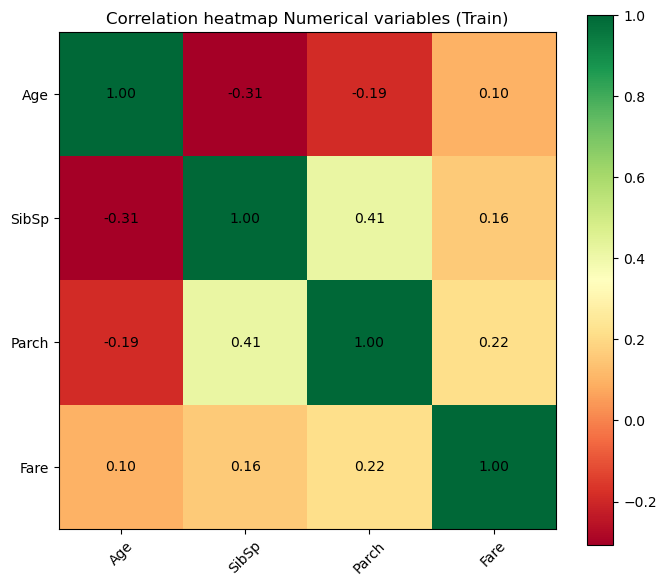

In [56]:
# Compute and plot Pearson correlation heatmap for numerical variables in the train dataset
corr_train = train[numerical_cols].corr(method="pearson")

fig, ax = plt.subplots(figsize=(7,6))

im = ax.imshow(corr_train, cmap="RdYlGn")
ax.set_xticks(range(len(numerical_cols)))
ax.set_yticks(range(len(numerical_cols)))
ax.set_xticklabels(numerical_cols, rotation=45)
ax.set_yticklabels(numerical_cols)

for i in range(len(numerical_cols)):
    for j in range(len(numerical_cols)):
        ax.text(j, i, f"{corr_train.iloc[i, j]:.2f}",
                ha="center", va="center")

plt.title("Correlation heatmap Numerical variables (Train)")
plt.colorbar(im, ax=ax)
plt.tight_layout()
plt.show()

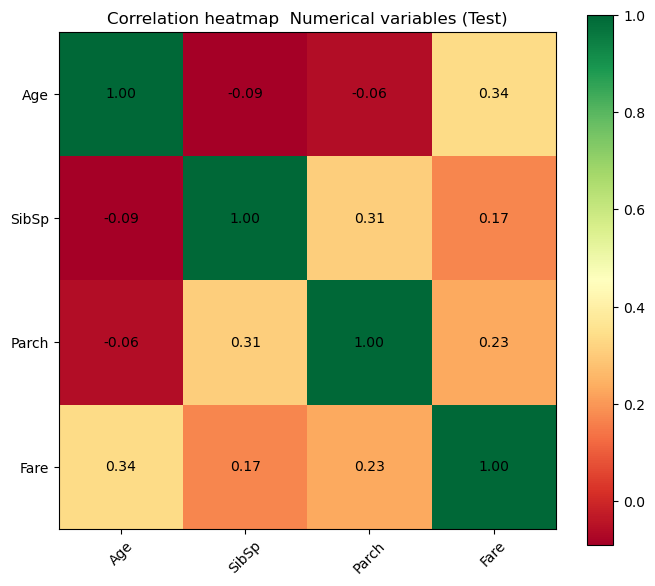

In [57]:
# Compute and plot Pearson correlation heatmap for numerical variables in the test dataset
numerical_cols_test = [col for col in numerical_cols if col in test.columns]

corr_test = test[numerical_cols_test].corr(method="pearson")

fig, ax = plt.subplots(figsize=(7,6))

im = ax.imshow(corr_test, cmap="RdYlGn")

ax.set_xticks(range(len(numerical_cols_test)))
ax.set_yticks(range(len(numerical_cols_test)))
ax.set_xticklabels(numerical_cols_test, rotation=45)
ax.set_yticklabels(numerical_cols_test)

for i in range(len(numerical_cols_test)):
    for j in range(len(numerical_cols_test)):
        ax.text(j, i, f"{corr_test.iloc[i, j]:.2f}",
                ha="center", va="center")

plt.title("Correlation heatmap  Numerical variables (Test)")
plt.colorbar(im, ax=ax)
plt.tight_layout()
plt.show()

In [58]:
categorical_cols = ["Sex", "Pclass", "Embarked", "Title", "Cabin_deck"]

# Compute pairwise Cramér's V matrix for categorical variables in the train dataset
cramers_matrix = pd.DataFrame(
    np.zeros((len(categorical_cols), len(categorical_cols))),
    index=categorical_cols,
    columns=categorical_cols
)


for i, col1 in enumerate(categorical_cols):
    for j, col2 in enumerate(categorical_cols):
        if i == j:
            cramers_matrix.loc[col1, col2] = 1.0
        else:
            v, _, _, _ = cramers_v(train[col1], train[col2])
            cramers_matrix.loc[col1, col2] = v

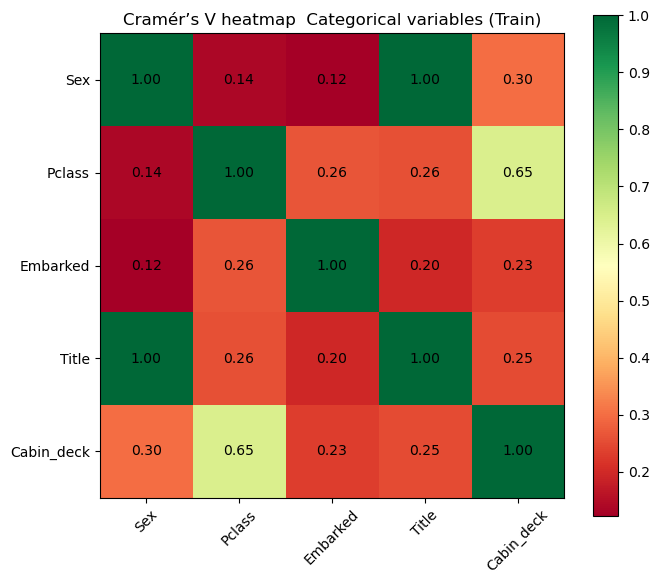

In [59]:
# Plot Cramér’s V heatmap for categorical variables in the train dataset
fig, ax = plt.subplots(figsize=(7,6))
im = ax.imshow(cramers_matrix, cmap="RdYlGn")

ax.set_xticks(range(len(categorical_cols)))
ax.set_yticks(range(len(categorical_cols)))
ax.set_xticklabels(categorical_cols, rotation=45)
ax.set_yticklabels(categorical_cols)


for i in range(len(categorical_cols)):
    for j in range(len(categorical_cols)):
        ax.text(j, i, f"{cramers_matrix.iloc[i, j]:.2f}",
                ha="center", va="center")

plt.title("Cramér’s V heatmap  Categorical variables (Train)")
plt.colorbar(im, ax=ax)
plt.tight_layout()
plt.show()

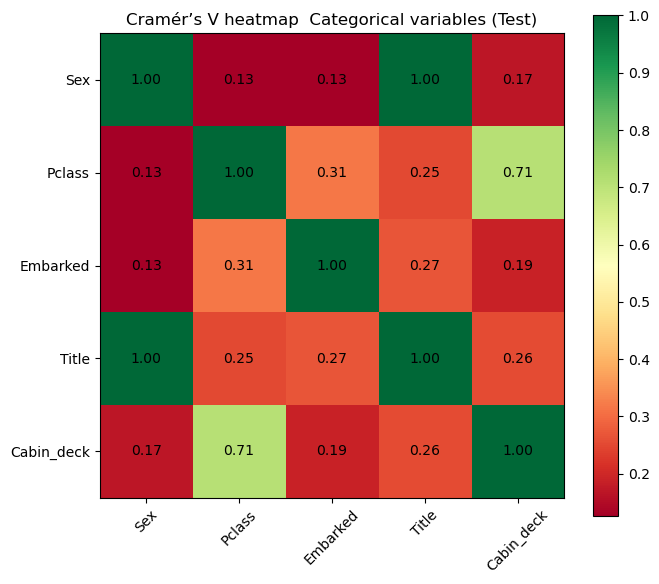

In [60]:
# Compute and plot Cramér’s V heatmap for categorical variables in the test set
cramers_matrix_test = pd.DataFrame(
    np.zeros((len(categorical_cols), len(categorical_cols))),
    index=categorical_cols,
    columns=categorical_cols
)

for i, col1 in enumerate(categorical_cols):
    for j, col2 in enumerate(categorical_cols):
        if i == j:
            cramers_matrix_test.loc[col1, col2] = 1.0
        else:
            v, _, _, _ = cramers_v(test[col1], test[col2])
            cramers_matrix_test.loc[col1, col2] = v

fig, ax = plt.subplots(figsize=(7,6))

im = ax.imshow(cramers_matrix_test, cmap="RdYlGn")

ax.set_xticks(range(len(categorical_cols)))
ax.set_yticks(range(len(categorical_cols)))
ax.set_xticklabels(categorical_cols, rotation=45)
ax.set_yticklabels(categorical_cols)

for i in range(len(categorical_cols)):
    for j in range(len(categorical_cols)):
        ax.text(j, i, f"{cramers_matrix_test.iloc[i, j]:.2f}",
                ha="center", va="center")

plt.title("Cramér’s V heatmap  Categorical variables (Test)")
plt.colorbar(im, ax=ax)
plt.tight_layout()
plt.show()

In [61]:
# Compute eta squared: proportion of variance in a numerical variable explained by a categorical variable
def eta_squared(x, y):
    """
    Eta squared: proportion of variance in x explained by categorical y.
    x: numerical variable
    y: categorical variable
    """
    groups = [x[y == level].dropna() for level in y.dropna().unique()]
    overall_mean = x.dropna().mean()
    
    ss_between = sum(len(g) * (g.mean() - overall_mean) ** 2 for g in groups)
    ss_total = sum((x.dropna() - overall_mean) ** 2)
    
    return ss_between / ss_total


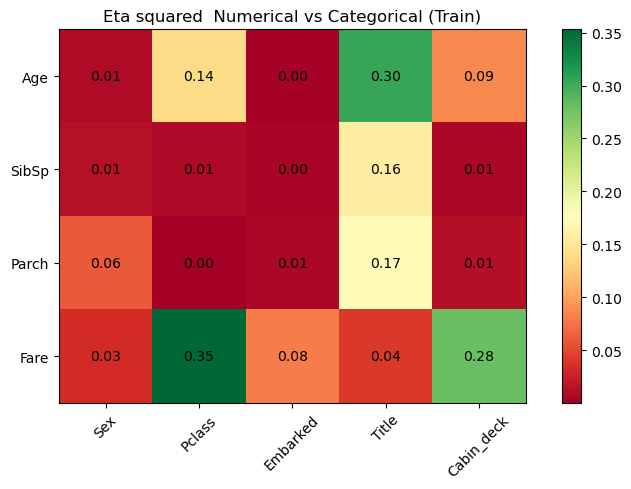

In [62]:
# Compute and plot eta-squared matrix between numerical and categorical variables (train set)
eta_matrix = pd.DataFrame(
    np.zeros((len(numerical_cols), len(categorical_cols))),
    index=numerical_cols,
    columns=categorical_cols
)

for num in numerical_cols:
    for cat in categorical_cols:
        eta_matrix.loc[num, cat] = eta_squared(train[num], train[cat])

fig, ax = plt.subplots(figsize=(8,5))

im = ax.imshow(eta_matrix, cmap="RdYlGn")

ax.set_xticks(range(len(categorical_cols)))
ax.set_yticks(range(len(numerical_cols)))
ax.set_xticklabels(categorical_cols, rotation=45)
ax.set_yticklabels(numerical_cols)

for i in range(len(numerical_cols)):
    for j in range(len(categorical_cols)):
        ax.text(j, i, f"{eta_matrix.iloc[i, j]:.2f}",
                ha="center", va="center")

plt.title("Eta squared  Numerical vs Categorical (Train)")
plt.colorbar(im, ax=ax)
plt.tight_layout()
plt.show()

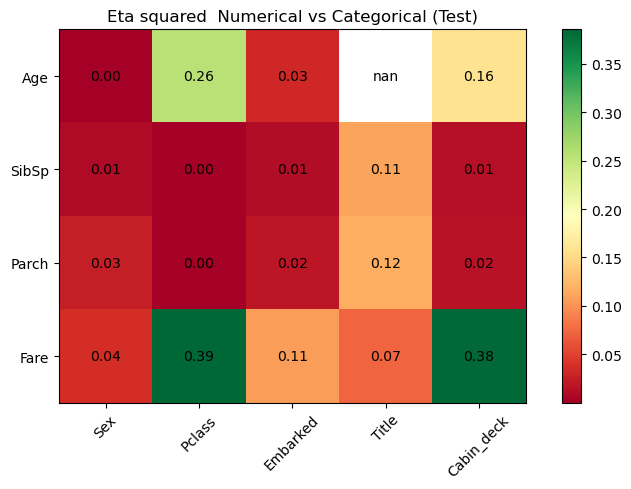

In [63]:
# Compute and plot eta-squared matrix between numerical and categorical variables (test set)
eta_matrix_test = pd.DataFrame(
    np.zeros((len(numerical_cols), len(categorical_cols))),
    index=numerical_cols,
    columns=categorical_cols
)

for num in numerical_cols:
    for cat in categorical_cols:
        eta_matrix_test.loc[num, cat] = eta_squared(test[num], test[cat])

fig, ax = plt.subplots(figsize=(8,5))

im = ax.imshow(eta_matrix_test, cmap="RdYlGn")

ax.set_xticks(range(len(categorical_cols)))
ax.set_yticks(range(len(numerical_cols)))
ax.set_xticklabels(categorical_cols, rotation=45)
ax.set_yticklabels(numerical_cols)

for i in range(len(numerical_cols)):
    for j in range(len(categorical_cols)):
        ax.text(j, i, f"{eta_matrix_test.iloc[i, j]:.2f}",
                ha="center", va="center")

plt.title("Eta squared  Numerical vs Categorical (Test)")
plt.colorbar(im, ax=ax)
plt.tight_layout()
plt.show()


The relationships among predictor variables were analysed using Pearson correlation for numerical variables, Cramér’s V for categorical variables, and Eta squared for numerical versus categorical pairs. Both train and test sets were considered to assess the stability of these relationships.

Among numerical variables, SibSp and Parch exhibit a moderate positive correlation, indicating that passengers with siblings or spouses aboard were also more likely to have parents or children travelling with them. In contrast, Age and Fare show only a weak linear association, suggesting that ticket price is not strongly determined by passenger age. These patterns are consistent between train and test, although some correlation magnitudes differ slightly due to sampling variation.

For categorical variables, Cramér’s V reveals a very strong association between Title and Sex, reflecting that titles largely encode gender information. A strong relationship is also observed between Pclass and Cabin_deck, indicating that cabin location is closely linked to passenger class. Other categorical associations are generally weaker, particularly those involving Embarked, which appears relatively independent from most other categorical features.

The mixed numerical categorical analysis using Eta squared shows that Fare is substantially explained by Pclass and Cabin_deck, confirming that ticket price is closely related to travel class and cabin location. Age displays a moderate association with Title and a weaker association with Pclass, consistent with age patterns embedded in certain titles. These findings are broadly stable across train and test sets.

Overall, the analysis highlights potential redundancy among variables, particularly between Title and Sex and between Pclass and Cabin_deck, which should be carefully considered in subsequent modeling stages to avoid multicollinearity or unnecessary duplication of information.


<h4 style="color:#F97316;"><b>7.3 Multivariate analysis of categorical variables (MCA) </b></h4>

In [64]:
categorical_cols_mca = [
    "Sex", "Pclass", "Embarked", "Title", "Cabin_deck", "SibSp", "Parch"
]

for col in categorical_cols_mca:
    train[col] = train[col].astype("category")

In [65]:
# One-hot encode categorical variables
X_mca = pd.get_dummies(train[categorical_cols_mca], drop_first=False)

In [66]:
# Perform MCA using PCA on the indicator matrix
mca = PCA(n_components=5)
mca_coords = mca.fit_transform(X_mca)

# Create a DataFrame with the two main dimensions
mca_df = pd.DataFrame(
    mca_coords,
    columns=["Dim1", "Dim2", "Dim3", "Dim4", "Dim5"],
    index=train.index
)
# Coordinates of categories in MCA space
loadings = pd.DataFrame(
    mca.components_.T,
    index=X_mca.columns,
    columns=["Dim1", "Dim2", "Dim3", "Dim4", "Dim5"]
)

# Print the proportion of variance explained by the first five MCA dimensions
explained_variance = mca.explained_variance_ratio_
print(f"Variance explained by Dim1: {explained_variance[0]:.3f}")
print(f"Variance explained by Dim2: {explained_variance[1]:.3f}")
print(f"Variance explained by Dim3: {explained_variance[2]:.3f}")
print(f"Variance explained by Dim4: {explained_variance[3]:.3f}")
print(f"Variance explained by Dim5: {explained_variance[4]:.3f}")

Variance explained by Dim1: 0.273
Variance explained by Dim2: 0.132
Variance explained by Dim3: 0.122
Variance explained by Dim4: 0.105
Variance explained by Dim5: 0.067


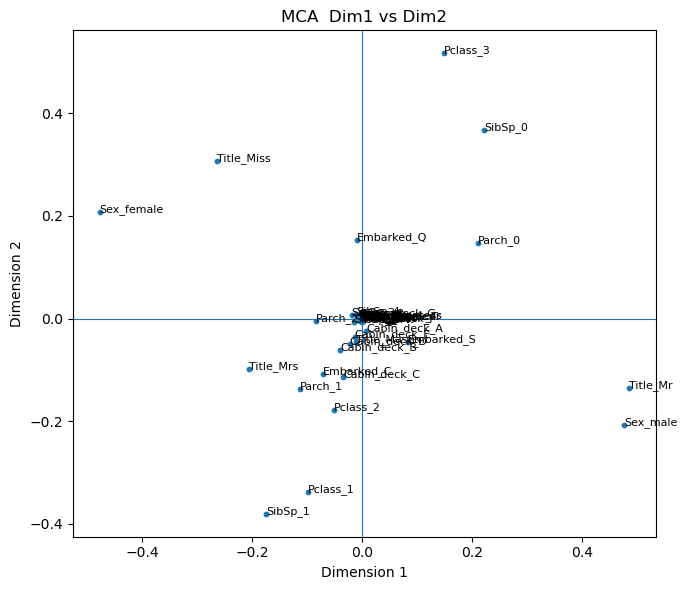

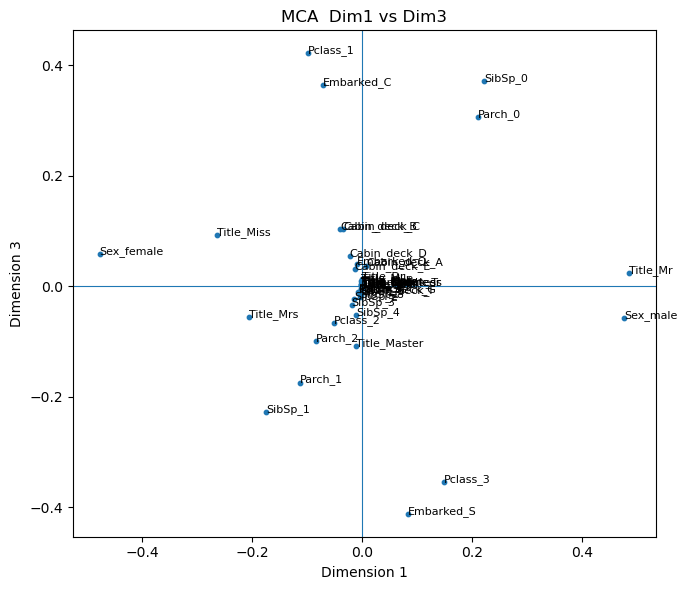

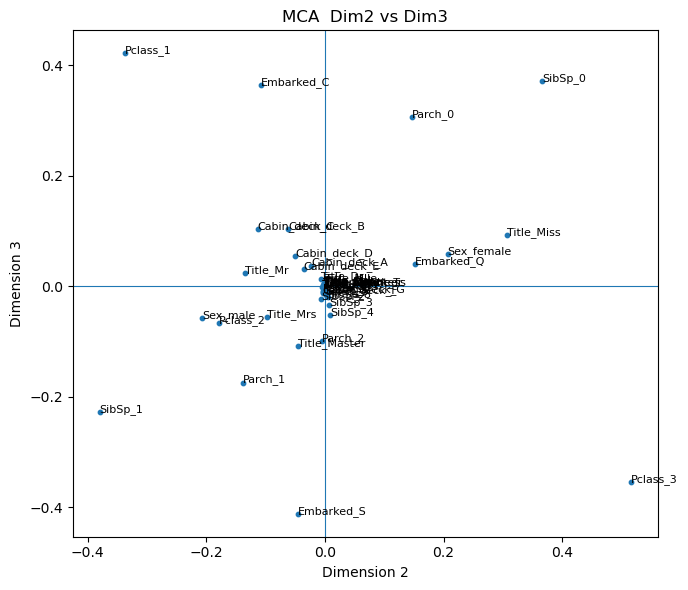

In [67]:
# Scatter plots of MCA loadings for pairs of dimensions (Dim1 vs Dim2, Dim1 vs Dim3, Dim2 vs Dim3)
fig, ax = plt.subplots(figsize=(7,6))

ax.scatter(loadings["Dim1"], loadings["Dim2"], s=10)
for label, x, y in zip(loadings.index, loadings["Dim1"], loadings["Dim2"]):
    ax.text(x, y, label, fontsize=8)

ax.axhline(0, linewidth=0.8)
ax.axvline(0, linewidth=0.8)
ax.set_xlabel("Dimension 1")
ax.set_ylabel("Dimension 2")
ax.set_title("MCA  Dim1 vs Dim2")
plt.tight_layout()
plt.show()

# ---- Dim1 vs Dim3 ----
fig, ax = plt.subplots(figsize=(7,6))

ax.scatter(loadings["Dim1"], loadings["Dim3"], s=10)
for label, x, y in zip(loadings.index, loadings["Dim1"], loadings["Dim3"]):
    ax.text(x, y, label, fontsize=8)

ax.axhline(0, linewidth=0.8)
ax.axvline(0, linewidth=0.8)
ax.set_xlabel("Dimension 1")
ax.set_ylabel("Dimension 3")
ax.set_title("MCA  Dim1 vs Dim3")
plt.tight_layout()
plt.show()

# ---- Dim2 vs Dim3 ----
fig, ax = plt.subplots(figsize=(7,6))

ax.scatter(loadings["Dim2"], loadings["Dim3"], s=10)
for label, x, y in zip(loadings.index, loadings["Dim2"], loadings["Dim3"]):
    ax.text(x, y, label, fontsize=8)

ax.axhline(0, linewidth=0.8)
ax.axvline(0, linewidth=0.8)
ax.set_xlabel("Dimension 2")
ax.set_ylabel("Dimension 3")
ax.set_title("MCA  Dim2 vs Dim3")
plt.tight_layout()
plt.show()

For the Multiple Correspondence Analysis (MCA), we included not only purely nominal categorical variables, but also the discrete numerical variables **SibSp** and **Parch**, which were treated as categorical. This choice is justified because both variables take a limited number of integer values that represent qualitatively distinct travel situations (traveling alone versus with family members), rather than a continuous quantitative scale. In addition, these variables had already been analyzed separately as discrete numerical variables in section 7.1.3, ensuring methodological consistency while allowing their joint relationships with other categorical features to be explored within a single multivariate framework.

Accordingly, the following variables were included in the MCA: Sex, Pclass, Embarked, Title, Cabin_deck, SibSp, and Parch. All variables were converted to the categorical data type before constructing the one hot encoded indicator matrix used in the analysis.

The MCA was initially performed with five dimensions. The proportion of explained inertia for the first five dimensions was: 0.273 for Dimension 1, 0.132 for Dimension 2, 0.122 for Dimension 3, 0.105 for Dimension 4, and 0.067 for Dimension 5. The first three dimensions together explained approximately 52.7 percent of the total inertia. Based on both this cumulative contribution and visual inspection of the factor planes, three dimensions were retained for interpretation. Dimensions beyond the third did not reveal clearly distinct or additional interpretable structures, and were therefore not prioritized in the main analysis. As a result, three pairwise projections were examined: Dim1 versus Dim2, Dim1 versus Dim3, and Dim2 versus Dim3.

Dimension 1 primarily differentiates passenger profiles related to social class and gender. Categories such as Pclass_3 and Sex_male are positioned on the positive side of this axis, while Sex_female and several higher class related categories appear on the negative side, indicating that this dimension reflects a socioeconomic and gender gradient.

Dimension 2 is mainly associated with family structure and travel context. Categories such as SibSp_0 and Parch_0 are clearly separated along this axis, showing that traveling alone versus with family members is a major source of variation. Certain embarkation categories, particularly Embarked_Q, also display distinct positions along this dimension.

Dimension 3 provides complementary information by further distinguishing combinations of class, embarkation, and family related variables. It helps separate specific groups within Pclass_1 and Pclass_3 and different levels of SibSp and Parch that were less clearly differentiated in the first two dimensions alone.

Across the three examined planes, coherent clusters of related categories emerge. Higher class categories tend to be positioned close to specific cabin decks and titles, while lower class categories cluster with different family configurations and embarkation points. Overall, the three dimensional solution offers a coherent and interpretable representation of the relationships among categorical and discrete variables, supporting its use for exploratory analysis of passenger profiles in this dataset.


<h3 style="color:#F97316;"><b>8. Conclusion</b></h3>

The exploratory data analysis of the Titanic dataset provided a detailed understanding of its structure, quality, and key patterns, establishing a robust basis for subsequent preprocessing and modeling.

From the initial inspection, the dataset was confirmed to contain a mix of categorical and numerical variables, requiring different analytical approaches and careful handling in later stages.

The comparison between the training and test datasets showed that both sets present similar distributions in most key variables, suggesting that the test set is representative of the same underlying population. No major structural discrepancies were identified that could compromise model generalization.

The analysis of missing values revealed that:
- **Cabin** presents a very high proportion of missing values, making it unreliable in its original form and requiring either substantial transformation, aggregation, or exclusion from certain analyses.
- **Age** contains a considerable number of missing values, indicating the need for an imputation strategy based on related variables such as Pclass, Sex, or extracted Title.
- **Embarked** has only a small number of missing values, which can be reasonably imputed without materially affecting the dataset.

The univariate analysis not only characterized individual variables but also informed key **feature engineering decisions**, namely:
- The **Name** variable contains structured information that can be leveraged by extracting titles such as Mr, Mrs, Miss, and Master.
- These titles showed meaningful relationships with Age, Sex, and Survival, justifying their use as derived features in subsequent modeling.
- The skewed distributions and presence of outliers in **Fare** and **Age** highlighted the need for possible transformations or robust modeling approaches.

The univariate analysis also showed that:
- Categorical variables such as **Sex** and **Pclass** are unevenly distributed.
- Numerical variables display varying degrees of dispersion, with potential outliers that should be considered during preprocessing.

The multivariate analysis highlighted that:
- **Sex, Pclass, and Fare** have associations with Survival, making them particularly relevant predictors.
- First class passengers exhibited substantially higher survival rates compared to second and third class.
- Female passengers had a markedly higher probability of survival than male passengers.
- Higher fares were generally associated with higher survival, reflecting underlying socio economic advantages.

Relationships between explanatory variables revealed that:
- **Pclass and Fare** are correlated, which may introduce multicollinearity in some models.
- **Age and extracted Title** are closely linked, reinforcing the relevance of feature engineering from Name.

The application of Multiple Correspondence Analysis to categorical variables indicated clear groupings among categories, particularly involving Sex, Pclass, and Embarked, confirming the presence of structured relationships in the data.

Overall, the analysis confirms that survival on the Titanic was influenced by a combination of demographic and socio economic factors. While the dataset contains valuable predictive information, careful treatment of missing values, feature engineering from Name, and consideration of variable dependencies are essential before building predictive models.
